# Wicklow mapping

Links:

* https://www.thejournal.ie/coillte-to-redesign-nine-dublin-forests-for-recreational-uses-and-to-support-biodiversity-4691679-Jun2019/

In [8]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib as mpl
import pylab as plt

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool, DataRange1d
from bokeh.tile_providers import get_provider, Vendors
from bokeh.plotting import figure
from bokeh.palettes import brewer

import panel as pn
import panel.widgets as pnw
pn.extension()
output_notebook()

Loading BokehJS ...

In [9]:
def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

In [10]:
counties = gpd.read_file('data/counties.shp')
counties=counties.to_crs("EPSG:3857")
counties = counties[counties.NAME_TAG.isin(['Wicklow','Dublin'])]

In [11]:
forests = gpd.read_file('data/wicklow/coillte_forestry.shp')
forests = forests.to_crs("EPSG:3857")
forests

full_id     osm_id  osm_type landuse          type  \
0       r304523     304523  relation  forest  multipolygon   
1      r2346883    2346883  relation  forest  multipolygon   
2      r3615430    3615430  relation  forest  multipolygon   
3      r3666460    3666460  relation  forest  multipolygon   
4      r4050549    4050549  relation  forest  multipolygon   
..          ...        ...       ...     ...           ...   
301  w699698892  699698892       way  forest          None   
302  w699698893  699698893       way  forest          None   
303  w700341676  700341676       way  forest          None   
304  w700341677  700341677       way  forest          None   
305  w700743318  700743318       way  forest          None   

                     name               name_en                   name_ga  \
0                    None                  None                      None   
1    Carrickgollogan Wood  Carrickgollogan Wood  Coill Carraig Uallacháin   
2                    None                  None                      None   
3                    None                  None                      None   
4      Kilmashogue Forest                  None                      None   
..                    ...                   ...                       ...   
301                  None                  None                      None   
302                  None                  None                      None   
303                  None                  None                      None   
304                  None                  None                      None   
305                  None                  None                      None   

    leaf_cycle     leaf_type corine amenity alt_name leisure natural  co_nat  \
0         None          None   None    None     None    None    None     NaN   
1         None          None   None    None     None    None    None     NaN   
2    evergreen  needleleaved   None    None     None    None    None     NaN   
3         None          None   None    None     None    None    None     NaN   
4    evergreen  needleleaved   None    None     None    None    None     1.0   
..         ...           ...    ...     ...      ...     ...     ...     ...   
301       None          None   None    None     None    None    None     NaN   
302       None          None   None    None     None    None    None     NaN   
303       None          None   None    None     None    None    None     NaN   
304       None          None   None    None     None    None    None     NaN   
305       None          None   None    None     None    None    None     NaN   

                                              geometry  
0    POLYGON ((-680183.874 7032921.750, -680105.294...  
1    POLYGON ((-685006.579 7024795.378, -684987.922...  
2    POLYGON ((-695523.733 7018356.587, -695499.911...  
3    POLYGON ((-692958.231 7022702.229, -692979.727...  
4    POLYGON ((-696952.485 7029068.760, -696956.393...  
..                                                 ...  
301  POLYGON ((-709613.296 7036280.035, -709615.044...  
302  POLYGON ((-709611.426 7036159.965, -709646.882...  
303  POLYGON ((-708442.182 7035924.245, -708436.661...  
304  POLYGON ((-708586.652 7035896.426, -708583.892...  
305  POLYGON ((-708423.569 7035834.737, -708425.952...  

[306 rows x 17 columns]

In [13]:
gdf = gpd.read_file('data/wicklow/2019_LEA_Boundaries.shp')
gdf=gdf.to_crs("EPSG:3857")
gdf

OBJECTID     LEA_Name    Shape__Are     Shape__Len  \
0         1   Greystones  6.509281e+07   55919.488013   
1         2      Wicklow  4.340960e+08  147399.664441   
2         3       Arklow  4.856288e+08  149779.174472   
3         4  Baltinglass  9.162211e+08  252574.720882   
4         5    Bray East  4.619042e+06   14219.796540   
5         6    Bray West  1.193068e+08   61338.998776   

                                          Candidates  \
0  <b>GREYSTONES</b><br><b> Name: </b>Crean, Mags...   
1  <b>WICKLOW</b><br><b> Name: </b>Dunne, Gail <b...   
2  <b>ARKLOW</b><br><b> Name: </b>Fitzgerald, Pat...   
3  <b>BALTINGLASS</b><br><b> Name: </b>Mullen, Jo...   
4  <b>BRAY EAST</b><br><b> Name: </b>McManus, Gra...   
5  <b>BRAY WEST</b><br><b> Name: </b>O'Brien, Der...   

                                            geometry  
0  POLYGON ((-671750.403 6995918.019, -671752.426...  
1  POLYGON ((-667699.373 6976619.511, -667699.842...  
2  POLYGON ((-674248.262 6956965.891, -674256.880...  
3  POLYGON ((-702853.892 7008637.605, -702856.895...  
4  POLYGON ((-676782.493 7018579.996, -676782.494...  
5  POLYGON ((-682253.917 7020235.084, -682248.189...

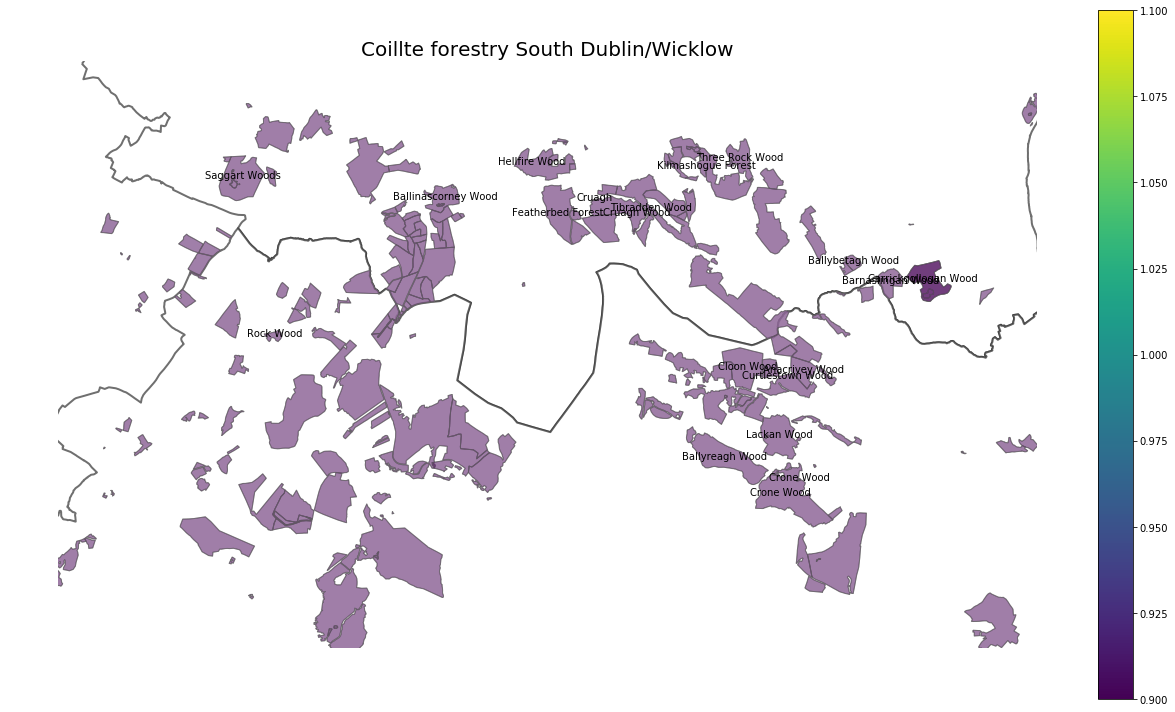

In [17]:
fig, ax = plt.subplots(1, figsize=(18,10))
counties.plot(linewidth=0.8, ax=ax, edgecolor='0.2',legend=True, color='white', lw=2, alpha=0.7)
forests.plot(linewidth=0.8, ax=ax, edgecolor='0.4',legend=True, color='white', lw=1, alpha=0.7)
forests.plot(column='co_nat',linewidth=0.8, ax=ax, edgecolor='0.4',legend=True, lw=1, alpha=0.5)
df=forests
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:][0])
for idx, row in df.iterrows():
    plt.annotate(s=row['name'], xy=row['coords'],
                 horizontalalignment='center')

minx, miny, maxx, maxy = counties.total_bounds
ax.set_xlim(-730000, -680000)
ax.set_ylim(7005000, 7035000)
ax.set_title('Coillte forestry South Dublin/Wicklow',fontsize=20)
ax.set_axis_off()
plt.tight_layout()
fig.savefig('coillte_map.png',dpi=200)

In [84]:
gsi = gpd.read_file('data/wicklow/GSI_Wicklow_CGS.shp')
gsi = gsi.to_crs("EPSG:3857")
#gsi[:3]

In [216]:
def bokeh_plot_map(geosources, colors, columns=None, title='', plot_width=500):
    """Plot bokeh map from GeoJSONDataSources """
    
    palette = brewer['OrRd'][8]
    palette = palette[::-1]    
    tools = 'wheel_zoom,pan,box_zoom,reset'
    h=int(plot_width*1.4)
    #minx, miny, maxx, maxy = counties.total_bounds
    #xr = DataRange1d(minx, maxx)
    #yr = DataRange1d(miny, maxy)
    p = figure(title = title, plot_height=h , plot_width=plot_width, #x_range=xr, y_range=yr,
               toolbar_location='right', tools=tools)
    i=0    
    for src in geosources:
        l=p.patches('xs','ys', source=src, fill_alpha=1, line_width=1.5, line_color='black', 
                    line_alpha=0.6, fill_color=colors[i])
        if columns == None:
            continue
        cols = columns[i]
        if cols != None:
            x = [(i, "@%s" %i) for i in cols]    
            hover = HoverTool(tooltips=x, point_policy='follow_mouse', renderers=[l])        
            #l.hover.tooltips = hover
            p.add_tools(hover)
        i+=1
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.match_aspect = True
    #BoxZoomTool.match_aspect = True    
    p.toolbar.logo = None
    return p

In [217]:
gsrc1 = get_geodatasource(counties)
gsrc2 = get_geodatasource(gsi)
gsrc3 = get_geodatasource(forests)
p = bokeh_plot_map([gsrc1,gsrc2,gsrc3], colors=['whitesmoke','brown','#99cc00'], columns=[None,['SITENAME','DESCRIPT'],['name']])
pn.pane.Bokeh(p)

Bokeh(Figure)

## Panel dashboard overlaying datasets on a single map

In [143]:
dataset_grp = pn.widgets.CheckBoxGroup(
    name='Dataset', value=['Outline','forestry','GSI'], options=['Outline', 'forestry', 'GSI'],
    inline=True)
dataframes = {'Outline':gdf,'GSI':gsi,'FORESTRY':forests}
columns = {'Outline':None, 'GSI':['SITENAME','DESCRIPT'],'FORESTRY':['name']}
def replot(event):
    sources=[]
    cols=[]
    for i in dataset_grp.value:
        print (i)
        sources.append(get_geodatasource(dataframes[i]))
        cols.append(columns[i])
    print (sources)
    plot_pane.object = bokeh_plot_map(sources,colors=['whitesmoke','blue','#99cc00'], columns=cols)
    return

dataset_grp.param.watch(replot,'value')
plot_pane = pn.pane.Bokeh(p)
app = pn.Column(dataset_grp,plot_pane)

In [144]:
app

Column
    [0] CheckBoxGroup(inline=True, name='Dataset', options=['Outline', 'forestry', ...], value=['Outline', 'forestry', ...])
    [1] Bokeh(Figure)

In [7]:
from sidecar import Sidecar
from ipywidgets import IntSlider

sc = Sidecar(title='Sidecar Output')
sl = IntSlider(description='Some slider')
with sc:
    display(sl)

IntSlider(value=0, description='Some slider')